# Coding and Soaring: Exploring sailplane performance in Python with glidepy

The glider polar describes the relationship between speed and sink rate. Usually it is included in the glider's flight manual in the form of a rather crude graph. For example, this is the polar provided for the ASW27. Both unballasted and ballasted curves are shown.

<img src="asw27polar.png" alt="Drawing" width="600"/>

We will create a mathematical representation of this curve using the programming language Python and the glidepy library. We can then easily analyze various aspects of salplane performance.

## What is glidepy?

glidepy is a Python library that performs common and useful polar and speed-to-fly calculations useful for sailplane performance analysis and simulations.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import warnings

glidepy is imported like any other library or module.

In [ ]:
# import the pyglider library
import pyglider_no_netto as pg 

In [5]:
warnings.simplefilter('ignore', np.RankWarning)
%matplotlib notebook

Lets define some useful unit conversion factors.

In [6]:
kmh_to_knots = 0.539957
ms_to_knots = 1.94384
knots_to_kmh = 1.852
nm_to_feet = 6076.12
nm_to_sm = 1.15078

## Creating the asw27

Create an unballasted asw27 Glider object and initialize it with the polar data points and the reference weight. The first vector are speeds in Km/h. The secind are the corresponding sink rates in m/s. The weight is in lbs. This is the part that uniquely specifies the glider we are analyzing and the configuration (ballasted or not).

For this, we need at least three points from the original polar and the associated reference weight. The rest is calculated by glidepy, including any data for other weights.

In [7]:
speeds = [90, 150.0, 200.0]
sink_rates = [-0.55, -1.11, -2.38]
ref_weight = 787
weight = 1102

In [8]:
asw27 = pg.Glider(speeds, sink_rates, ref_weight)

# A ballasted glider is created by specifying the ballasted weight also
asw27_wet = pg.Glider(speeds, sink_rates, ref_weight, weight)

#### glidepy creates a mathematical model of the sailplane polar.

Now we can ask: What is the sink rate (in knots) at 100 knots? We can query the model of the polar.

In [9]:
asw27.polar(100)  # speed and resulting sink rate in knots

-3.7151792055454873

We can set a non-zero airmass sink/lift, ie, netto. In this case to get the total sink rate use the sink_rate attribute. The polar attribute used above always stays the same as a reference.

## Plotting the polar

Lets plot the polar in the speed range 40 to 140 knots in 5 knot increments.

In [11]:
speed_range = np.arange(40, 145, 5)
polar_graph = [asw27.polar(x) for x in speed_range]

# And for the ballasted glider too
polar_graph_wet = [asw27_wet.polar(x) for x in speed_range]

We will plot the the dry and wet polars, together with the source data points from which the models were created.

<IPython.core.display.Javascript object>


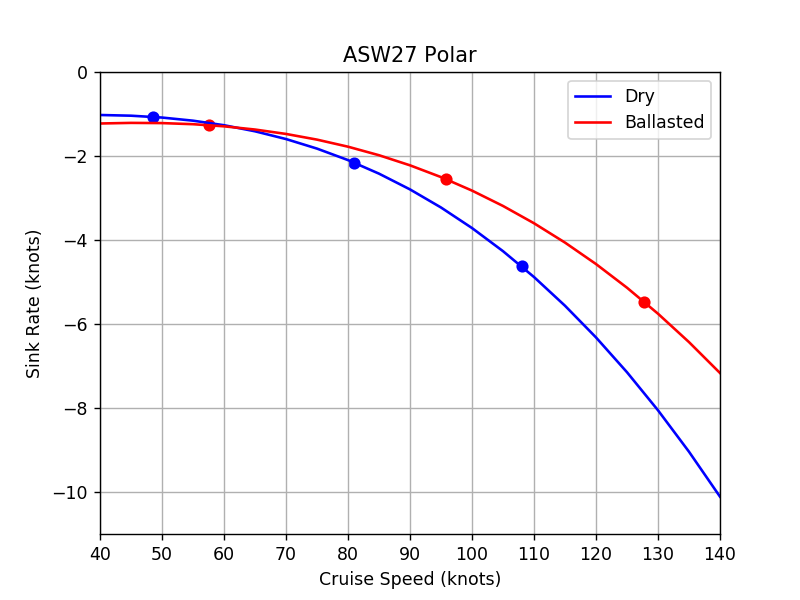

In [12]:
fig, ax = plt.subplots()

ax.plot(speed_range, polar_graph, color="blue")
ax.scatter(asw27.speeds, asw27.sink_rates, color="blue")

ax.plot(speed_range, polar_graph_wet, color="red")
ax.scatter(asw27_wet.speeds, asw27_wet.sink_rates, color="red")

ax.set(title='ASW27 Polar',
       ylabel='Sink Rate (knots)',
       xlabel='Cruise Speed (knots)',
       xticks=range(40,150,10), 
       ylim=(-11, 0),
       xlim=(40, 140))
ax.legend(['Dry', 'Ballasted'])
plt.grid()
plt.show()

## The Best L/D

Lets get the Best L/D and the corresponding speed.

In [13]:
print(asw27.best_ld())  
print(asw27.best_ld_speed())  # knots

47.5816908337363
57.0925956148


In [14]:
print(asw27_wet.best_ld())  
print(asw27_wet.best_ld_speed())  # knots

47.581690895939566
67.5569397884


#### Notice the Best L/D is the same but the best speed is higher in the ballasted glider.  

What's the sink rate at the best L/D speed?

In [15]:
blds = asw27.best_ld_speed()
print(blds)
asw27.polar(blds)  # in ft/min

57.0925956148


-1.1998858093182501

What's the L/D (or glide ratio) at 80 knots?

In [16]:
asw27.glide_ratio(80)

38.140053575389345

## Plotting the L/D

Lets plot the L/D graphs for a range of speeds.

In [17]:
speed_range = np.arange(55, 145, 1)
glide_ratio_graph = [asw27.glide_ratio(x) for x in speed_range]

# And for the ballasted glider too
glide_ratio_graph_wet = [asw27_wet.glide_ratio(x) for x in speed_range]

<IPython.core.display.Javascript object>


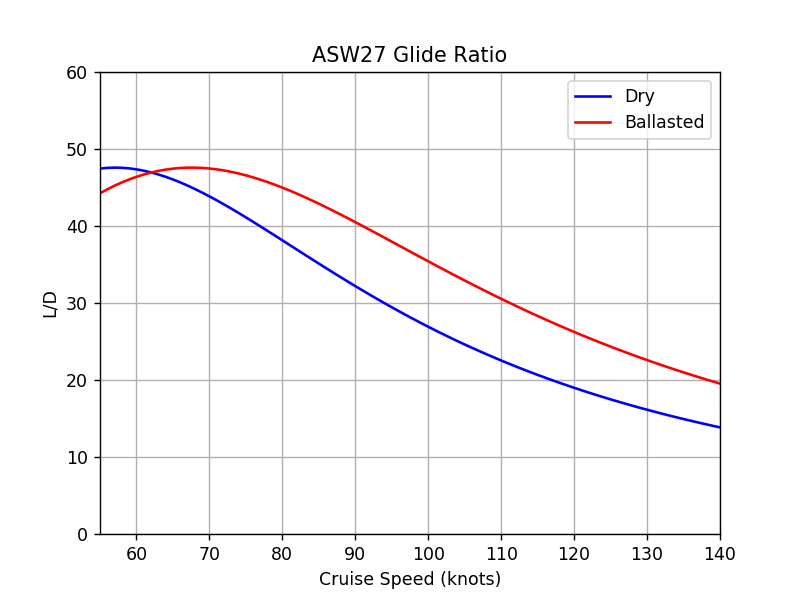

In [18]:
fig, ax = plt.subplots()

ax.plot(speed_range, glide_ratio_graph, color="blue")

ax.plot(speed_range, glide_ratio_graph_wet, color="red")

ax.set(title='ASW27 Glide Ratio',
       ylabel='L/D',
       xlabel='Cruise Speed (knots)',
       xticks=range(40,150,10), 
       ylim=(0, 60),
       xlim=(55, 140))
ax.legend(['Dry', 'Ballasted'])
plt.grid()
plt.show()

#### The L/D of a fully ballasted ASW27 is still over 40 at 90 knots!

## Calculating altitude loss and range

We can calculate the altitude lost by cruising at speed for a given distance. The result is a list with the first element in nm and the second in feet.

In [19]:
# Altitude loss per nm
distance = 1
altitude_loss = asw27.altitude_lost(asw27.best_ld_speed(), distance)[1]  # second element of returned list in feet
print(altitude_loss)  # feet per nautical mile

127.69869867


We can get the range at a set speed from a set altitude

In [20]:
# Miles per 1000 feet
print(1000/altitude_loss)

7.83093336434


Are these values the same for the ballasted  asw27?

In [21]:
# Altitude loss per nm
distance = 1
altitude_loss = asw27_wet.altitude_lost(asw27_wet.best_ld_speed(), distance)[1]  # second element of returned list in feet
print(altitude_loss)  # feet per nautical mile
# Miles per 1000 feet
print(1000/altitude_loss)

127.698698503
7.83093337458


#### Although the values are the same, notice that they are referenced to the best L/D speed, which is different for the two configurations. 

Lets calculate the values for the same actual speed.

In [22]:
# For the dry glider
speed = 80
# Altitude loss per nm
distance = 1
altitude_loss = asw27.altitude_lost(speed, distance)[1]  # second element of returned list in feet
print(altitude_loss)  # feet per nautical mile
# Miles per 1000 feet
print(1000/altitude_loss)

159.310735838
6.27704087072


In [23]:
# For the ballasted glider
speed = 80
# Altitude loss per nm
distance = 1
altitude_loss = asw27_wet.altitude_lost(speed, distance)[1]  # second element of returned list in feet
print(altitude_loss)  # feet per nautical mile
# Miles per 1000 feet
print(1000/altitude_loss)

135.066644887
7.40375242783


#### Notice the increased range of the ballasted glider!

In [24]:
# range in nm for 1000 feet at 57 knots
print(asw27.get_range(1000, 57))

7.83089556397


In [25]:
# range in statute miles for 1000 feet at 57 knots
print(nm_to_sm * asw27.get_range(1000, 57)) 

9.0116379971


In [26]:
altitude = 5000
speed_range = np.arange(55, 145, 1)
range_graph = [asw27.get_range(altitude, x) for x in speed_range]

# And for the ballasted glider too
range_graph_wet = [asw27_wet.get_range(altitude, x) for x in speed_range]

<IPython.core.display.Javascript object>


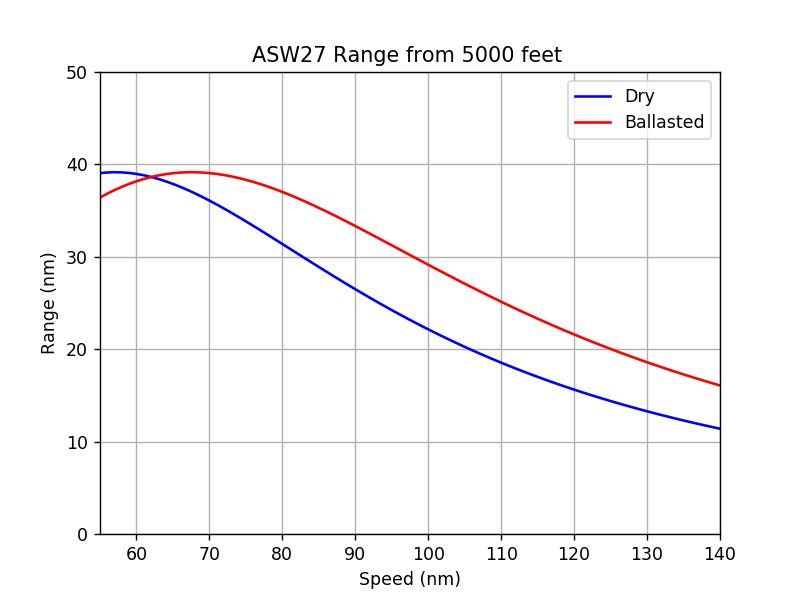

In [30]:
fig, ax = plt.subplots()

ax.plot(speed_range, range_graph, color="blue")

ax.plot(speed_range, range_graph_wet, color="red")

ax.set(title='ASW27 Range from %d feet ' % altitude,
       ylabel='Range (nm)',
       xlabel='Speed (nm)',
       xticks=range(40,150,10), 
       ylim=(0, 50),
       xlim=(55, 140))
ax.legend(['Dry', 'Ballasted'])
plt.grid()
plt.show()